In [59]:
# Imports
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import numpy as np 
from datascience import *
import pandas as pd

from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

In [60]:
# Read in 'Housing.csv'
housing = pd.read_csv('Housing.csv')
housing_columns = housing.columns
housing_arr = housing.values
housing

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [61]:
conditions = [housing_arr == "no", housing_arr == "yes", housing_arr == 'furnished', housing_arr == 'semi-furnished', housing_arr == 'unfurnished']
values = [0, 1, 2, 1, 0]

housing_arr = np.select(conditions, values, housing_arr)

pd.DataFrame(housing_arr, columns=housing_columns)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,2


In [62]:
# Takes in an np_array and removes features for a percentage of rows and sets missing values to np.nan
def remove_random_features(arr, percent=.10):
    num_rows_to_modify = int(percent * arr.shape[0])
    rand_rows = np.random.choice(np.arange(arr.shape[0]), num_rows_to_modify, replace=False)
    new_arr = arr.copy()
    for i in rand_rows:
        rand_index = np.random.randint(0, arr.shape[1])
        new_arr[i, rand_index] = np.nan
    
    return new_arr

In [63]:
housing_with_missing_features = remove_random_features(housing_arr)
pd.DataFrame(housing_with_missing_features, columns=housing_columns)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,NaN,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0
543,1750000,2910,3,1,1,0,0,0,0,0,0,NaN,2


In [64]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(housing_with_missing_features)
mean_imputed_housing_arr = imp_mean.transform(housing_with_missing_features)
pd.DataFrame(mean_imputed_housing_arr, columns=housing_columns)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000.0,7420.0,4.0,2.0,3.0,1.0,0.00000,0.000000,0.0,1.0,2.0,1.000000,2.0
1,12250000.0,8960.0,4.0,4.0,4.0,1.0,0.17658,0.000000,0.0,1.0,3.0,0.000000,2.0
2,12250000.0,9960.0,3.0,2.0,2.0,1.0,0.00000,1.000000,0.0,0.0,2.0,1.000000,1.0
3,12215000.0,7500.0,4.0,2.0,2.0,1.0,0.00000,1.000000,0.0,1.0,3.0,1.000000,2.0
4,11410000.0,7420.0,4.0,1.0,2.0,1.0,1.00000,1.000000,0.0,1.0,2.0,0.000000,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000.0,3000.0,2.0,1.0,1.0,1.0,0.00000,1.000000,0.0,0.0,2.0,0.000000,0.0
541,1767150.0,2400.0,3.0,1.0,1.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.000000,1.0
542,1750000.0,3620.0,2.0,1.0,1.0,1.0,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.0
543,1750000.0,2910.0,3.0,1.0,1.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.235185,2.0


In [65]:
mean_mse = (np.square(housing_arr - mean_imputed_housing_arr)).mean()
mean_mse

115040753.76732126

In [66]:
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
imp_median.fit(housing_with_missing_features)
median_imputed_housing_arr = imp_median.transform(housing_with_missing_features)
pd.DataFrame(median_imputed_housing_arr, columns=housing_columns)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000.0,7420.0,4.0,2.0,3.0,1.0,0.0,0.0,0.0,1.0,2.0,1.0,2.0
1,12250000.0,8960.0,4.0,4.0,4.0,1.0,0.0,0.0,0.0,1.0,3.0,0.0,2.0
2,12250000.0,9960.0,3.0,2.0,2.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,1.0
3,12215000.0,7500.0,4.0,2.0,2.0,1.0,0.0,1.0,0.0,1.0,3.0,1.0,2.0
4,11410000.0,7420.0,4.0,1.0,2.0,1.0,1.0,1.0,0.0,1.0,2.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000.0,3000.0,2.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0
541,1767150.0,2400.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
542,1750000.0,3620.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
543,1750000.0,2910.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [67]:
median_mse = (np.square(housing_arr - median_imputed_housing_arr)).mean()
median_mse

82781375.153563872

In [68]:
imp_most_frequent = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp_most_frequent.fit(housing_with_missing_features)
most_frequent_imputed_housing_arr = imp_most_frequent.transform(housing_with_missing_features)
pd.DataFrame(most_frequent_imputed_housing_arr, columns=housing_columns)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,2


In [69]:
most_frequent_mse = (np.square(housing_arr - most_frequent_imputed_housing_arr)).mean()
most_frequent_mse

320140148.67508823

In [70]:
k = 5
imp_knn = KNNImputer(missing_values=np.nan, n_neighbors=k)
knn_imputed_housing_arr = imp_knn.fit_transform(housing_with_missing_features)
pd.DataFrame(knn_imputed_housing_arr, columns=housing_columns)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000.0,7420.0,4.0,2.0,3.0,1.0,0.0,0.0,0.0,1.0,2.0,1.0,2.0
1,12250000.0,8960.0,4.0,4.0,4.0,1.0,0.2,0.0,0.0,1.0,3.0,0.0,2.0
2,12250000.0,9960.0,3.0,2.0,2.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,1.0
3,12215000.0,7500.0,4.0,2.0,2.0,1.0,0.0,1.0,0.0,1.0,3.0,1.0,2.0
4,11410000.0,7420.0,4.0,1.0,2.0,1.0,1.0,1.0,0.0,1.0,2.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000.0,3000.0,2.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0
541,1767150.0,2400.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
542,1750000.0,3620.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
543,1750000.0,2910.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [71]:
knn_mse = (np.square(housing_arr - knn_imputed_housing_arr)).mean()
knn_mse

358562253.4860298

In [72]:
[mean_mse, median_mse, most_frequent_mse, knn_mse]

[115040753.76732126, 82781375.153563872, 320140148.67508823, 358562253.4860298]

In [160]:
def simulate(imputer, data, trials, remove_func=remove_random_features, percent_missing=.10):
    np.random.seed(42)
    
    res = np.zeros(trials)
    
    for i in range(trials):
        data_with_missing_features = remove_func(data, percent_missing)
        imputed_data = imputer.fit_transform(data_with_missing_features)
        
        res[i] = (np.abs(data - imputed_data)).mean()
    return res

In [161]:
trials = 1000
results = pd.DataFrame([simulate(SimpleImputer(missing_values=np.nan, strategy='median'),housing_arr, trials), 
              simulate(SimpleImputer(missing_values=np.nan, strategy='mean'), housing_arr, trials),
              simulate(SimpleImputer(missing_values=np.nan, strategy='most_frequent'), housing_arr, trials),
              simulate(KNNImputer(missing_values=np.nan, n_neighbors=3), housing_arr, trials),
              simulate(IterativeImputer(random_state=0), housing_arr, trials)
             ]).T
results.columns = ['Median', 'Mean', 'Mode', 'KNN-3', 'Iterative']
results

,Median,Mean,Mode,KNN-3,Iterative
0,2100.334227,2100.170431,2099.927735,1608.913056,1274.321137
1,578.237968,700.598892,538.915455,668.322465,687.233903
2,387.270430,675.079158,328.583063,624.225218,758.659082
3,722.305293,783.753322,870.587579,484.447330,687.463139
4,1503.310374,1267.103930,1977.873536,721.568666,1036.965906
...,...,...,...,...,...
995,1615.835286,1410.966254,2268.114749,934.914844,1470.664632
996,1191.239097,1251.123008,1379.199577,1152.134227,1103.638569
997,1255.537332,1255.776613,1256.130134,873.577793,1069.968387
998,1097.703599,1038.252558,1413.864502,866.678193,816.368363


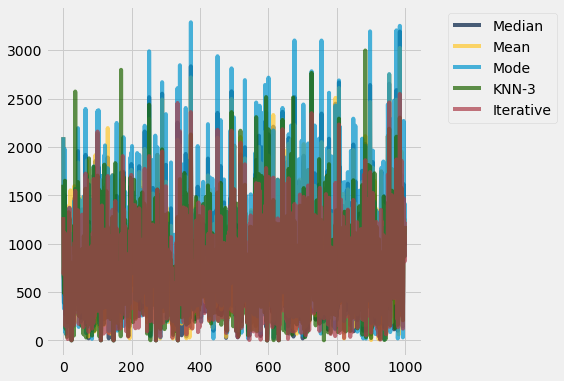

In [162]:
results_table = Table.from_df(results)
results_table.plot()

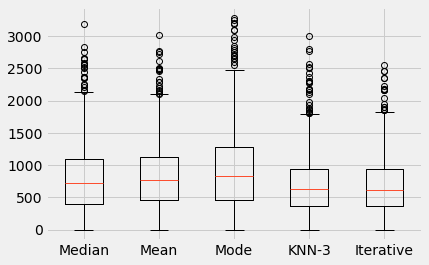

In [163]:
results_table.boxplot()

In [164]:
results_table.mean()

Median,Mean,Mode,KNN-3,Iterative
809.69,835.781,927.453,708.055,686.462


In [165]:
results_table_in_millions = Table.from_df(results_table.to_df() / 1e6)
results_table_in_millions

Median,Mean,Mode,KNN-3,Iterative
0.00210033,0.00210017,0.00209993,0.00160891,0.00127432
0.000578238,0.000700599,0.000538915,0.000668322,0.000687234
0.00038727,0.000675079,0.000328583,0.000624225,0.000758659
0.000722305,0.000783753,0.000870588,0.000484447,0.000687463
0.00150331,0.0012671,0.00197787,0.000721569,0.00103697
0.000735105,0.00103338,0.000404816,0.00165006,0.00110713
0.000267464,0.000389429,7.99409e-05,0.000153411,0.000150148
0.000529585,0.000529585,0.000529726,0.000119578,0.000361396
0.000273766,0.000395592,6.62229e-05,0.000277837,0.000276646
0.00135409,0.00135392,0.00135385,0.00118578,0.00103222


C:\Anaconda\lib\site-packages\datascience\tables.py:5865: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_xticklabels(ticks, rotation='vertical')


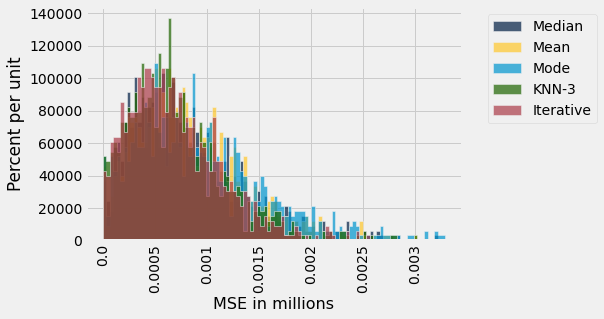

In [166]:
results_table_in_millions.hist(bins=100)
plt.xlabel('MSE in millions')
plt.show()

In [167]:
trials = 1000
results_2 = pd.DataFrame([simulate(SimpleImputer(missing_values=np.nan, strategy='median'),housing_arr, trials,percent_missing=.5), 
              simulate(SimpleImputer(missing_values=np.nan, strategy='mean'), housing_arr, trials,percent_missing=.5),
              simulate(SimpleImputer(missing_values=np.nan, strategy='most_frequent'), housing_arr, trials,percent_missing=.5),
              simulate(KNNImputer(missing_values=np.nan, n_neighbors=3), housing_arr, trials,percent_missing=.5),
              simulate(IterativeImputer(random_state=0), housing_arr, trials,percent_missing=.5)
             ]).T
results_2.columns = ['Median', 'Mean', 'Mode', 'KNN-3', 'Iterative']
results_2

,Median,Mean,Mode,KNN-3,Iterative
0,5593.937756,5639.942311,5685.991390,4144.736156,4058.856573
1,4796.694001,4676.634080,5570.303599,3685.540296,3429.865109
2,3955.460692,3778.749865,4068.362315,3258.761327,3496.446471
3,3745.226394,4004.568675,3755.730275,2835.912726,2764.093086
4,5342.772195,4861.808232,5461.046718,2626.611244,3302.130248
...,...,...,...,...,...
995,3884.437121,3632.967106,4005.611433,2911.503458,4072.911332
996,2770.935639,2987.780046,2732.939873,2004.365843,1755.179222
997,4849.303599,5068.909244,5431.762315,4312.443990,4663.702308
998,4133.508680,4310.289573,4825.763444,3101.678099,3276.532089


In [168]:
results_table_2 = Table.from_df(results_2)
results_table_2.mean()

Median,Mean,Mode,KNN-3,Iterative
4090.98,4221.44,4509.41,3128.29,3435.13


In [169]:
results_table.mean()

Median,Mean,Mode,KNN-3,Iterative
809.69,835.781,927.453,708.055,686.462


In [170]:
def remove_random_features_row_indepedent(arr, percent=.10):
    num_rows_to_modify = int(percent * arr.shape[0]*arr.shape[1])
    rand_rows = np.random.choice(np.arange(arr.shape[0]), num_rows_to_modify, replace=True)
    rand_cols = np.random.choice(np.arange(arr.shape[1]), num_rows_to_modify, replace=True)
    new_arr = arr.copy()
    for i,j in zip(rand_rows, rand_cols):
        new_arr[i, j] = np.nan
    
    return new_arr

In [171]:
trials = 1000
results_3 = pd.DataFrame([simulate(SimpleImputer(missing_values=np.nan, strategy='median'),housing_arr, trials,remove_random_features_row_indepedent,.5), 
              simulate(SimpleImputer(missing_values=np.nan, strategy='mean'), housing_arr, trials, remove_random_features_row_indepedent, .5),
              simulate(SimpleImputer(missing_values=np.nan, strategy='most_frequent'), housing_arr, trials, remove_random_features_row_indepedent, .5),
              simulate(KNNImputer(missing_values=np.nan, n_neighbors=3), housing_arr, trials, remove_random_features_row_indepedent, .5),
              simulate(IterativeImputer(random_state=0), housing_arr, trials, remove_random_features_row_indepedent, .5)
             ]).T
results_3.columns = ['Median', 'Mean', 'Mode', 'KNN-3', 'Iterative']
results_3


,Median,Mean,Mode,KNN-3,Iterative
0,45116.053493,45399.259476,45275.239802,83604.579864,41633.581718
1,43438.797177,43470.002608,43698.391673,75324.823524,40291.857144
2,42958.663938,44160.086019,48150.348624,93868.138462,39503.075912
3,41661.345660,43460.663437,41604.129852,78507.127594,39905.383399
4,37061.146789,38360.175419,43678.908257,90798.393319,34150.375572
...,...,...,...,...,...
995,41174.722018,42534.766556,46730.607057,84115.880405,37982.843133
996,39100.465561,40494.059846,39348.199153,81738.016231,34599.366942
997,38845.125900,40658.992732,43649.480734,72624.520583,34661.228140
998,43885.078335,44375.523287,50380.387015,76836.710045,39915.660513


In [172]:
results_table_3 = Table.from_df(results_3)
results_table_3.mean()

Median,Mean,Mode,KNN-3,Iterative
42266.9,43460.1,45668.3,88286.7,39045.6


In [173]:
results_table.mean()

Median,Mean,Mode,KNN-3,Iterative
809.69,835.781,927.453,708.055,686.462


In [174]:
results_table_2.mean()

Median,Mean,Mode,KNN-3,Iterative
4090.98,4221.44,4509.41,3128.29,3435.13
